# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1:Adir Shlomov
# student 2:Mika Cohen

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [153]:
def read_data():
    train_set = pd.read_csv('cancer_train.csv')  # לוקח את הנתונים מהקובץ
    test_set = pd.read_csv('cancer_test.csv')

    print(train_set.head())  # הצגת 5 השורות הראשונות של ה-train
    print(test_set.head())  # הצגת 5 השורות הראשונות של ה-test
    return train_set,test_set



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

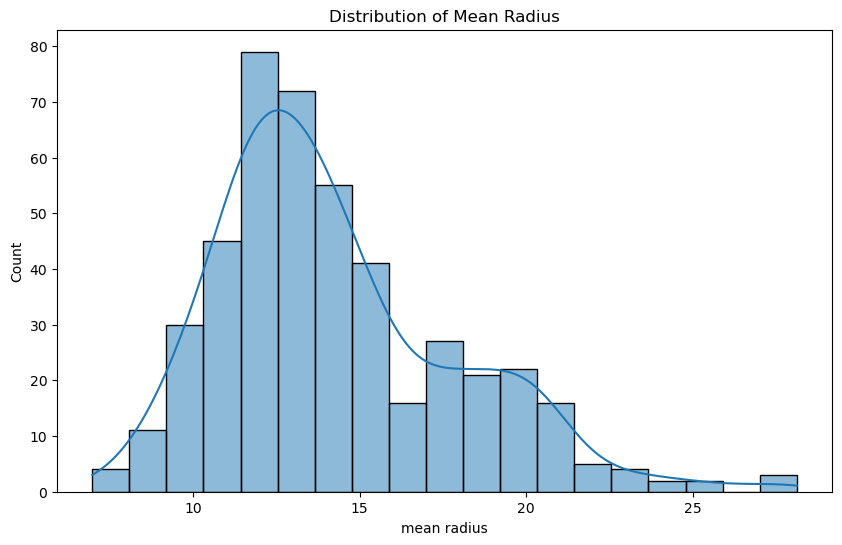

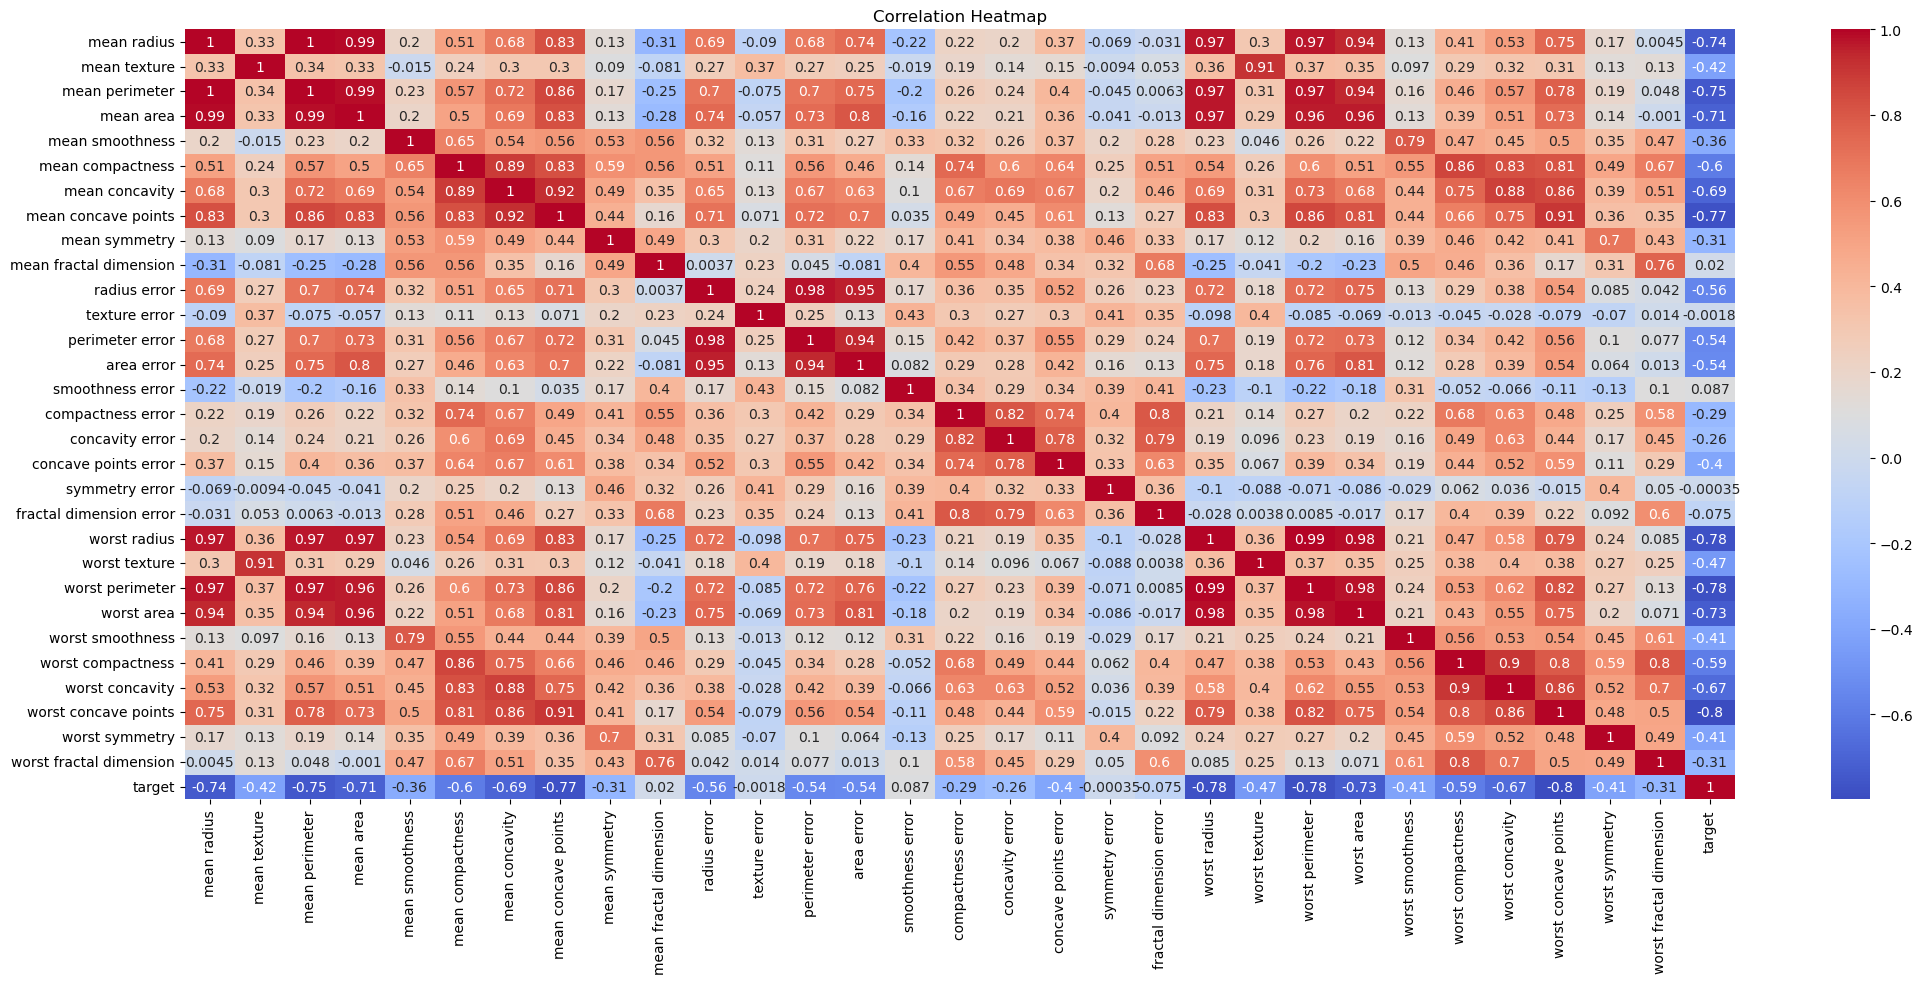

In [155]:
train_set,test_set=read_data()
print("Train Data Statistics:")
print(train_set.describe())

# ויזואליזציה 1: התפלגות משתנים מסוימים
plt.figure(figsize=(10, 6))
sns.histplot(train_set['mean radius'], kde=True)
plt.title('Distribution of Mean Radius')
plt.show()

# ויזואליזציה 2: heatmap של הקורלציות
plt.figure(figsize=(25, 10))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [158]:
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']
X_test = test_set.drop('target', axis=1)
y_test = test_set['target']

# Pipeline עם Feature Engineering (StandardScaler) ומודל KNN
# מנסה אלגורתים knn
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# הגדרת ה-Grid Search עבור KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],# מה ערך הk 
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # מרחק מנהטן או אוקלידי
}



# Random Forest הוא אלגוריתם סיווג (או רגרסיה) מקבוצת ensemble 
# שמשתמש במספר רב של עצי החלטה כדי לשפר את הדיוק והאמינות של המודל. הוא מתבסס על הרעיון של בניית מספר עצי החלטה עצמאיים והפקת התחזית הסופית על סמך התוצאות של כל העצים הללו.
# Pipeline עם Feature Engineering (StandardScaler) ומודל
# מודל של יער רנדומלי שהוא אוסף של עצי החלטה (Decision Trees) המייצר תחזיות על ידי שילוב תוצאות ממספר עצים. ה-Random State 
#של 42 נועד כדי לקבל תוצאות שחזוריות (כאשר מריצים את הקוד שוב, תתקבל אותה תוצאה).
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # שלב 1: StandardScaler - מנרמל את התכונות כך שלכל תכונה יהיו ממוצע 0 וסטיית תקן 1
    ('classifier', RandomForestClassifier(random_state=42))  # שלב 2: RandomForestClassifier - אלגוריתם היער הרנדומלי
])


#המתמקד במציאת מישור הפרדה אופטימלי שמפריד בין מחלקות הנתונים בצורה הטובה ביותר. 
# הגדרת ה-Grid Search עבור Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],  # מספר העצים ביער הרנדומלי
    'classifier__max_depth': [None, 10, 20],  # העומק המקסימלי של כל עץ ביער
    'classifier__min_samples_split': [2, 5]  # המספר המינימלי של דוגמאות הדרושות כדי לפצל צומת בעץ
}

# זהו אלגוריתם לסיווג אשר מנסה למצוא את הקו (היפר-מישר) המפריד בין מחלקות בצורה אופטימלית. גם כאן יש שימוש ב-random_state של 42 כדי לשמור על עקביות בתוצאות.
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),  # שלב 1: StandardScaler - מנרמל את התכונות כמו למעלה
    ('classifier', SVC(random_state=42))  # שלב 2: SVC - מודל מכונת וקטורים תומכת (Support Vector Classifier)
])


# הגדרת ה-Grid Search עבור SVC
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],  # פרמטר C - שולט על הקשיחות של מודל SVM
    'classifier__kernel': ['linear', 'rbf'],  # סוג ה- kernel: לינארי או רדיאלי בסיסי (RBF)
    'classifier__gamma': ['scale', 'auto']  # פרמטר gamma, קובע את ההשפעה של כל נקודה בבחירת ההיפר-מישר
}





In [160]:
# ביצוע Grid Search עם 5-fold Cross-Validation עבור KNN
#מבצע את אלגוריתם KNN
grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# אימון המודל על ה-training set
grid_search_knn.fit(X_train, y_train)
# תחזית על ה-test set
y_pred_knn = grid_search_knn.predict(X_test)

# ביצוע Grid Search עם 5-fold Cross-Validation עבור Random Forest
# הפעלת המודל של עצי החלטה 
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# אימון המודל
grid_search_rf.fit(X_train, y_train)

# ביצוע Grid Search עם 5-fold Cross-Validation עבור SVC
# הפעלת המודל של הריבועים הסינים
grid_search_svc = GridSearchCV(
    estimator=pipeline_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
# אימון המודל
grid_search_svc.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1_macro')

In [161]:
# הדפסת התוצאות הטובות ביותר
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best F1 score for KNN: {grid_search_knn.best_score_}")


# דו"ח ביצועים עבור KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# הצגת התוצאות הטובות ביותר
print("Random Forest Best Params:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("\nSVC Best Params:", grid_search_svc.best_params_)
print("SVC Best Score:", grid_search_svc.best_score_)

Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best F1 score for KNN: 0.9650801148053525
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.99      0.99      0.99        80

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Random Forest Best Score: 0.9628000401370654

SVC Best Params: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
SVC Best Score: 0.9767557965739959


In [166]:
# יוצא data frame שמציג את שלושת האלגוריתם 
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVC', 'KNN'],
    'Best Params': [grid_search_rf.best_params_, grid_search_svc.best_params_, grid_search_knn.best_params_],
    'Best F1 Macro Score': [grid_search_rf.best_score_, grid_search_svc.best_score_, grid_search_knn.best_score_]
})

print("\nSummary of Results:")
print(results)


Summary of Results:
           Model                                        Best Params  \
0  Random Forest  {'classifier__max_depth': None, 'classifier__m...   
1            SVC  {'classifier__C': 0.1, 'classifier__gamma': 's...   
2            KNN  {'classifier__n_neighbors': 3, 'classifier__p'...   

   Best F1 Macro Score  
0             0.962800  
1             0.976756  
2             0.965080  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [169]:
# מוצא את המודל הכי טוב ומאמן אותו לפי המודל הכי טוב
best_model = grid_search_svc.best_estimator_
best_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=0.1, kernel='linear', random_state=42))])

In [174]:
#הקוד הזה מבצע מספר פעולות כדי לחזות, להעריך ולהציג את ביצועי המודל האופטימלי שנבחר 
# חיזוי על ה-test set
predictions = best_model.predict(X_test)

# הצגת 5 החיזויים הראשונים
print("\nFirst 5 Predictions on Test Set:")
print(predictions[:5])

# הערכת איכות המודל
f1 = f1_score(y_test, predictions, average='macro')
print("\nF1 Macro Score on Test Set:", f1)

# דו"ח מפורט
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Malignant', 'Benign']))



First 5 Predictions on Test Set:
[1 1 0 1 1]

F1 Macro Score on Test Set: 0.9790441176470588

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.97      0.97        34
      Benign       0.99      0.99      0.99        80

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

